
# Sistema Inteligente de Scoring Crediticio con Redes Neuronales Profundas

Objetivo:

Diseñar, entrenar y evaluar un modelo de red neuronal profunda para predecir la probabilidad de impago de clientes bancarios, utilizando un conjunto de datos realista. El modelo debe ser explicable, eficiente y presentar resultados interpretables para su uso en contextos financieros.
Contexto:

Las entidades financieras deben decidir si otorgan o no un crédito a un cliente. Esta decisión, si se basa en modelos poco explicables, puede generar sesgos, exclusiones injustas o pérdida económica. Se busca construir un modelo moderno, basado en redes neuronales profundas, que sea a la vez preciso y explicable.

# 1. Carga y análisis de datos:

•
Usar el dataset "German Credit Data" (Kaggle).

•
Analizar variables categóricas, numéricas y distribución de clases.

In [2]:
import pandas as pd
import numpy as np

# Ruta al archivo
ruta = '/content/Mod7/german.data'

# Definir nombres de columnas
columnas = [
    'estado_cuenta', 'duracion_meses', 'historial_credito', 'proposito', 'monto_credito',
    'ahorros_bonos', 'tiempo_empleo', 'tasa_cuota', 'estado_personal_sexo', 'otros_deudores',
    'residencia_actual', 'propiedad', 'edad', 'otros_planes_pago', 'vivienda',
    'num_creditos', 'trabajo', 'personas_a_cargo', 'telefono', 'trabajador_extranjero',
    'riesgo_crediticio'
]

# Leer el dataset
df = pd.read_csv(ruta, header=None, sep=r'\s+', names=columnas)

# Mostrar información básica
print("Información general del dataset:")
print(f"- Dimensiones: {df.shape}")
print(f"- Columnas: {list(df.columns)}")
print("\nPrimeras 5 filas:")
print(df.head())

# Mapear la variable objetivo (riesgo_crediticio)
df['riesgo_crediticio'] = df['riesgo_crediticio'].map({1: 0, 2: 1})

# Separar X e y
X = df.drop('riesgo_crediticio', axis=1)
y = df['riesgo_crediticio']

# Mostrar detalles de X e y
print("\nVariables predictoras (X):")
print(f"- Forma: {X.shape}")

print("\nVariable objetivo (y):")
print(f"- Forma: {y.shape}")
print(f"- Valores únicos: {np.unique(y.values)}")


Información general del dataset:
- Dimensiones: (1000, 21)
- Columnas: ['estado_cuenta', 'duracion_meses', 'historial_credito', 'proposito', 'monto_credito', 'ahorros_bonos', 'tiempo_empleo', 'tasa_cuota', 'estado_personal_sexo', 'otros_deudores', 'residencia_actual', 'propiedad', 'edad', 'otros_planes_pago', 'vivienda', 'num_creditos', 'trabajo', 'personas_a_cargo', 'telefono', 'trabajador_extranjero', 'riesgo_crediticio']

Primeras 5 filas:
  estado_cuenta  duracion_meses historial_credito proposito  monto_credito  \
0           A11               6               A34       A43           1169   
1           A12              48               A32       A43           5951   
2           A14              12               A34       A46           2096   
3           A11              42               A32       A42           7882   
4           A11              24               A33       A40           4870   

  ahorros_bonos tiempo_empleo  tasa_cuota estado_personal_sexo otros_deudores  \
0  

1.1 Analisis y discusion acerca del desbalanceo

**Que buscamos?**

* Visualizar la distribución de la variable objetivo (riesgo_crediticio).

* Ver la proporción y cantidad de clases.

* Visualizar la correlación entre variables numéricas (para detectar relaciones).

* Algunos gráficos exploratorios para variables categóricas clave.


**A continuacion una descripcion breve para cada punto mencionado, segun los resultados obtenidos mas adelante.**

- Se observa que la clase 'Bueno' (0) es mayoritaria, con aproximadamente el 70% de los casos,
  mientras que la clase 'Malo' (1) representa el 30%, confirmando un desbalance moderado.
- La correlación entre variables numéricas muestra que algunas están relacionadas (por ejemplo,
  duración del crédito y monto de crédito), lo que puede influir en el modelo.
- El monto de crédito tiende a variar según el riesgo, con clientes 'malos' mostrando medianas
  diferentes en la distribución.
- El estado de cuenta parece tener una distribución diferente para las dos clases, indicando
  que es una variable relevante para la predicción.


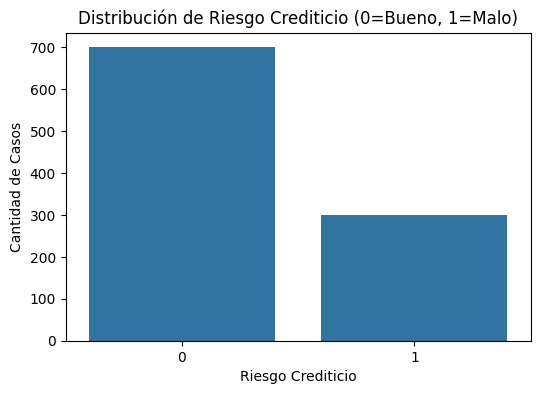

Distribución de clases:
Clase 0: 700 casos, 70.00%
Clase 1: 300 casos, 30.00%


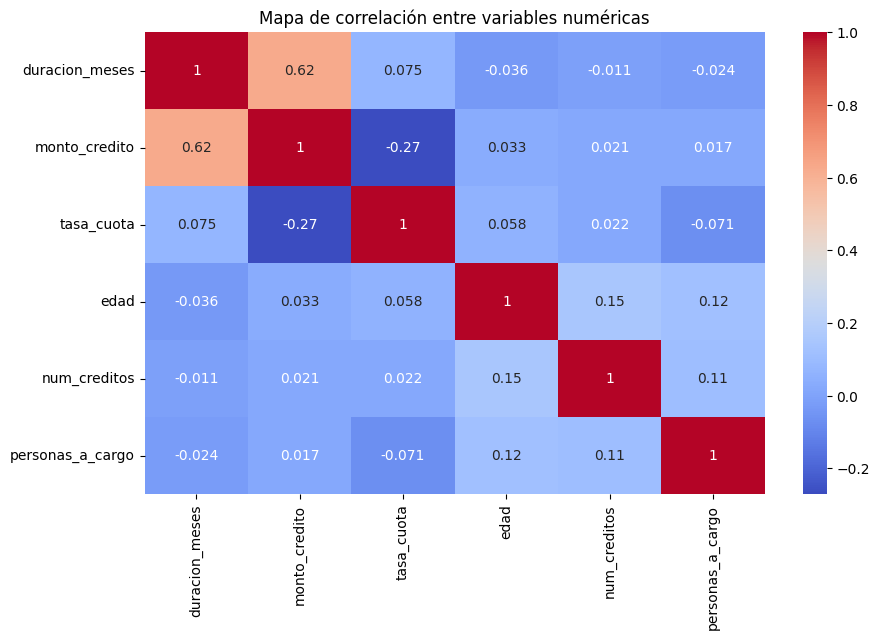

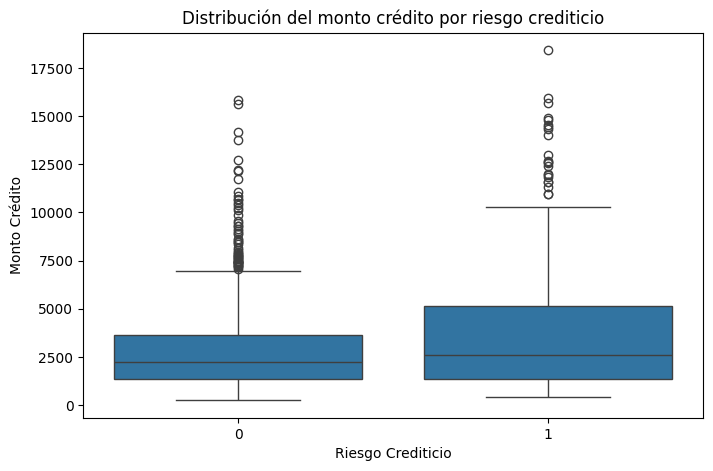

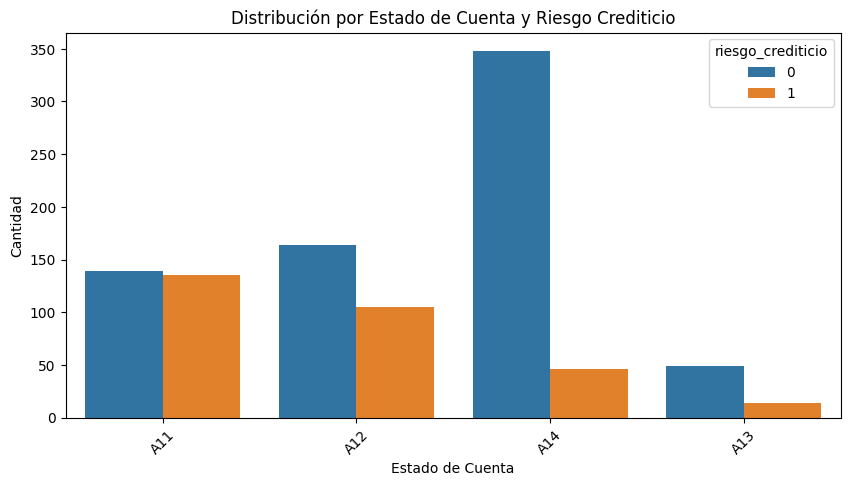


Discusión:
- Se observa que la clase 'Bueno' (0) es mayoritaria, con aproximadamente el 70% de los casos,
  mientras que la clase 'Malo' (1) representa el 30%, confirmando un desbalance moderado.
- La correlación entre variables numéricas muestra que algunas están relacionadas (por ejemplo,
  duración del crédito y monto de crédito), lo que puede influir en el modelo.
- El monto de crédito tiende a variar según el riesgo, con clientes 'malos' mostrando medianas
  diferentes en la distribución.
- El estado de cuenta parece tener una distribución diferente para las dos clases, indicando
  que es una variable relevante para la predicción.



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x='riesgo_crediticio', data=df)
plt.title('Distribución de Riesgo Crediticio (0=Bueno, 1=Malo)')
plt.xlabel('Riesgo Crediticio')
plt.ylabel('Cantidad de Casos')
plt.show()

# Proporción de clases
clases = df['riesgo_crediticio'].value_counts()
total = len(df)
print("Distribución de clases:")
for cls, cnt in clases.items():
    print(f"Clase {cls}: {cnt} casos, {(cnt/total)*100:.2f}%")

# Correlación entre variables numéricas
num_vars = ['duracion_meses', 'monto_credito', 'tasa_cuota', 'edad', 'num_creditos', 'personas_a_cargo']
plt.figure(figsize=(10,6))
sns.heatmap(df[num_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de correlación entre variables numéricas')
plt.show()

# Boxplot para observar distribución de monto_credito según riesgo
plt.figure(figsize=(8,5))
sns.boxplot(x='riesgo_crediticio', y='monto_credito', data=df)
plt.title('Distribución del monto crédito por riesgo crediticio')
plt.xlabel('Riesgo Crediticio')
plt.ylabel('Monto Crédito')
plt.show()

# Visualizar una variable categórica (por ejemplo, estado_cuenta) contra riesgo
plt.figure(figsize=(10,5))
sns.countplot(x='estado_cuenta', hue='riesgo_crediticio', data=df)
plt.title('Distribución por Estado de Cuenta y Riesgo Crediticio')
plt.xlabel('Estado de Cuenta')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

# Breve discusión
print("""
Discusión:
- Se observa que la clase 'Bueno' (0) es mayoritaria, con aproximadamente el 70% de los casos,
  mientras que la clase 'Malo' (1) representa el 30%, confirmando un desbalance moderado.
- La correlación entre variables numéricas muestra que algunas están relacionadas (por ejemplo,
  duración del crédito y monto de crédito), lo que puede influir en el modelo.
- El monto de crédito tiende a variar según el riesgo, con clientes 'malos' mostrando medianas
  diferentes en la distribución.
- El estado de cuenta parece tener una distribución diferente para las dos clases, indicando
  que es una variable relevante para la predicción.
""")


# 2. Preprocesamiento de datos

Preprocesamiento:

•
Normalización, codificación de variables, manejo de desbalanceo (SMOTE, peso en la pérdida, y otros).



## Justificación del Preprocesamiento y Balanceo

* Normalización (StandardScaler): Se aplica a variables numéricas para asegurar que todas tengan una escala similar, facilitando la convergencia y desempeño de modelos sensibles a la magnitud de los datos.

* Codificación One-Hot: Se utiliza para transformar variables categóricas en formato numérico binario, permitiendo que los modelos de machine learning procesen estas variables adecuadamente.

* Balanceo con SMOTE: El conjunto original presenta desbalance (700 casos clase buena vs 300 clase mala). SMOTE genera nuevas muestras sintéticas de la clase minoritaria para equilibrar las clases, evitando que el modelo aprenda sesgos hacia la clase mayoritaria y mejorando la capacidad de generalización.





In [4]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Asumiendo df, X, y ya definidos

# Variables numéricas (según lo que vimos)
num_cols = ['duracion_meses', 'monto_credito', 'tasa_cuota', 'edad', 'num_creditos', 'personas_a_cargo']

# Variables categóricas (todas las demas excepto la variable objetivo)
cat_cols = [col for col in X.columns if col not in num_cols]

print("Variables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

# Pipeline para preprocesamiento

# Escalador para numericas
num_transformer = StandardScaler()

# Codificador para categoricas
cat_transformer = OneHotEncoder(handle_unknown='ignore')

# Se combinan ambas en un ColumTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Aplicacion de preprocesamiento a X
X_processed = preprocessor.fit_transform(X)

print("Forma de X después de preprocesamiento:", X_processed.shape)

# Revision del balance en la variable objetivo
print("Distribución original de clases:")
print(pd.Series(y).value_counts())

# Aplicacion de SMOTE para balancear
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_processed, y)

print("Distribución después de SMOTE:")
print(pd.Series(y_bal).value_counts())
print("Forma de X después de SMOTE:", X_bal.shape)

Variables numéricas: ['duracion_meses', 'monto_credito', 'tasa_cuota', 'edad', 'num_creditos', 'personas_a_cargo']
Variables categóricas: ['estado_cuenta', 'historial_credito', 'proposito', 'ahorros_bonos', 'tiempo_empleo', 'estado_personal_sexo', 'otros_deudores', 'residencia_actual', 'propiedad', 'otros_planes_pago', 'vivienda', 'trabajo', 'telefono', 'trabajador_extranjero']
Forma de X después de preprocesamiento: (1000, 64)
Distribución original de clases:
riesgo_crediticio
0    700
1    300
Name: count, dtype: int64
Distribución después de SMOTE:
riesgo_crediticio
0    700
1    700
Name: count, dtype: int64
Forma de X después de SMOTE: (1400, 64)


# 3. Construcción del modelo


Comparar una red DNN simple con una red moderna como:


* ResNet para tabulares (con skip connections).

* TabNet (opcional).

Aplicar regularización (Dropout, L2) y callbacks (EarlyStopping, ReduceLROnPlateau).




Justificación arquitectónica:

* DNN (Red Neuronal Profunda): Es la base estándar para datos tabulares. Capas densas con activación ReLU permiten aprender combinaciones no lineales de características.

* ResNet (Red Residual): Añade conexiones residuales que ayudan a evitar el problema de gradientes desvanecientes y permiten entrenar redes más profundas. Aunque ResNet es famoso en imágenes, adaptarlo para tabular ayuda a capturar patrones complejos sin degradar la señal.

* Optimización de hiperparámetros: Primero se hizo a modo experimento, la comparacion de un modelo DNN simple vs Resnet Tabular para ver los resultados y luego se prueba con diferentes números de capas y neuronas para encontrar buen balance entre capacidad y sobreajuste, la idea de esto es ver que tal andan los modelos con optimizacion vs sin optimizar para poder ver que tal se comportan con este dataset

* SMOTE: Balancea clases para evitar sesgo del modelo.

### 3.1 Comparacion modelo DNN Simple vs Resnet Tabular (ambos sin optimizar)

* Incluye vizualizaciones simples para analizar preliminarmente

 Dropout aplicado con tasa = 0.3
 Dropout aplicado con tasa = 0.3

 Entrenando DNN simple...
 Comenzando entrenamiento...

 Epoch 1: Learning Rate = 0.001000
 Epoch 2: Learning Rate = 0.001000
 Epoch 3: Learning Rate = 0.001000
 Epoch 4: Learning Rate = 0.001000
 Epoch 5: Learning Rate = 0.001000
 Epoch 6: Learning Rate = 0.001000
 Epoch 7: Learning Rate = 0.001000
 Epoch 8: Learning Rate = 0.001000
 Epoch 9: Learning Rate = 0.001000
 Epoch 10: Learning Rate = 0.001000
 Epoch 11: Learning Rate = 0.001000
 Epoch 12: Learning Rate = 0.001000
 Epoch 13: Learning Rate = 0.001000
 Epoch 14: Learning Rate = 0.001000
 Epoch 15: Learning Rate = 0.001000
 Epoch 16: Learning Rate = 0.001000
 Epoch 17: Learning Rate = 0.001000
 Epoch 18: Learning Rate = 0.001000
 Epoch 19: Learning Rate = 0.001000
 Epoch 20: Learning Rate = 0.001000
 Epoch 21: Learning Rate = 0.001000
 Epoch 22: Learning Rate = 0.001000
 Epoch 23: Learning Rate = 0.001000
 Epoch 24: Learning Rate = 0.001000
 Epoch 25: Learning Ra

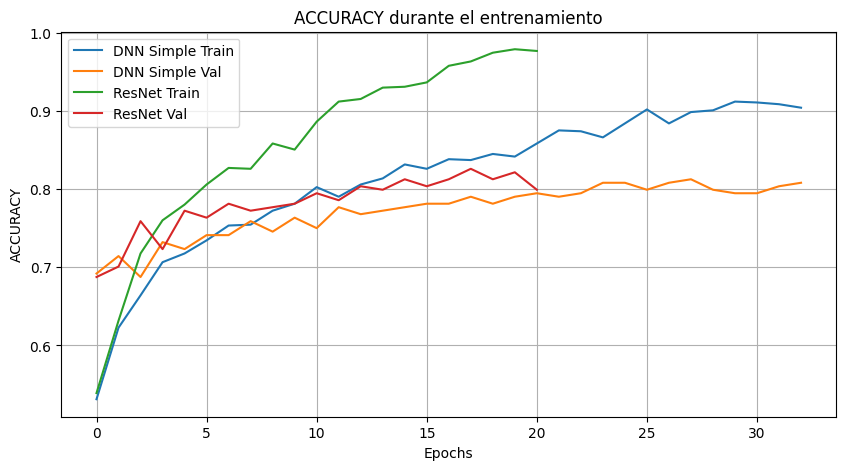

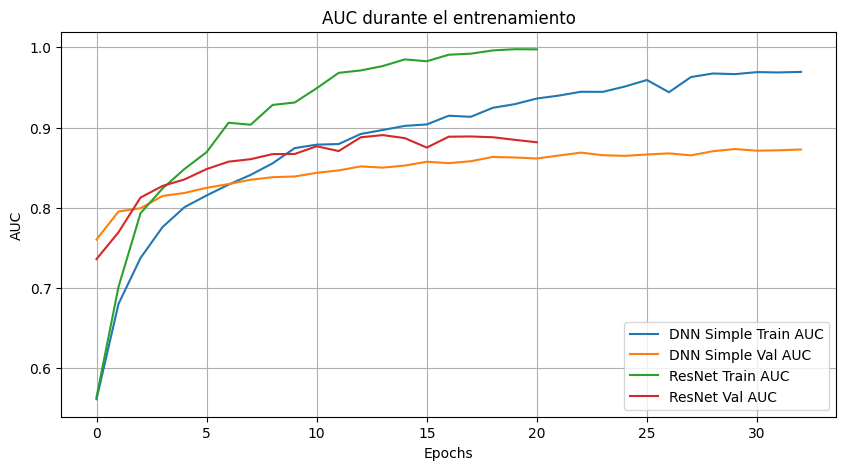

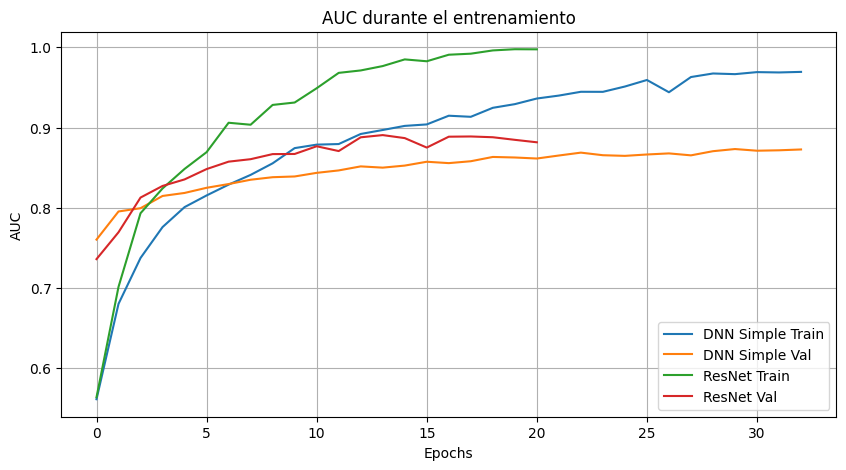

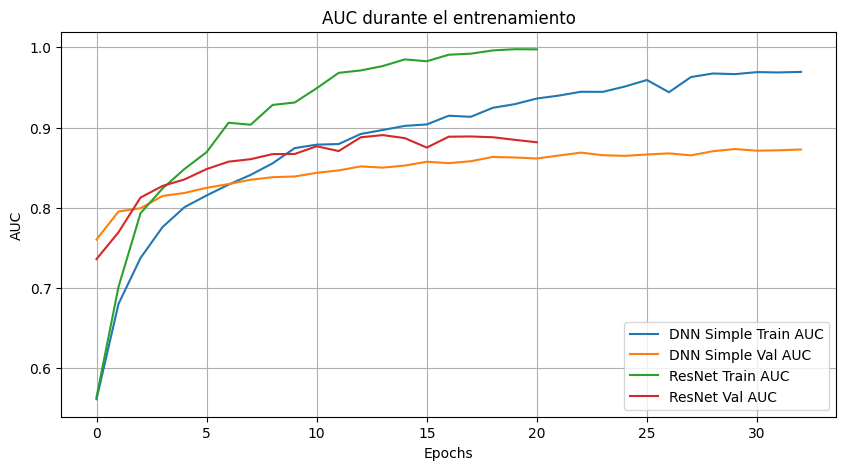


 Resumen de resultados:
DNN Simple -> Accuracy: 0.8429 | AUC: 0.8997
ResNet     -> Accuracy: 0.8071 | AUC: 0.8805


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers, callbacks, Input
from keras.metrics import AUC

#  Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42)

#  Crear DNN simple
def create_dnn(input_shape, l2_reg=1e-4, dropout_rate=0.3):
    print(f" Dropout aplicado con tasa = {dropout_rate}")
    model = models.Sequential([
        Input(shape=input_shape),
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC(name='auc')])
    return model

#  Bloque residual
def residual_block(x, units, l2_reg=1e-4, dropout_rate=0.3):
    shortcut = x
    x = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(units, kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

#  Crear ResNet
def create_resnet(input_shape, l2_reg=1e-4, dropout_rate=0.3):
    print(f" Dropout aplicado con tasa = {dropout_rate}")
    inputs = Input(shape=input_shape)
    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(inputs)
    for _ in range(3):
        x = residual_block(x, 64, l2_reg, dropout_rate)
    x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', AUC(name='auc')])
    return model

#  Callback personalizado para mensajes de eventos
class TrainingNotifier(callbacks.Callback):
    def on_train_begin(self, logs=None):
        print(" Comenzando entrenamiento...\n")

    def on_epoch_end(self, epoch, logs=None):
        lr = self.model.optimizer.learning_rate
        lr_val = float(tf.keras.backend.get_value(lr))
        print(f" Epoch {epoch + 1}: Learning Rate = {lr_val:.6f}")

    def on_train_end(self, logs=None):
        print("\n Entrenamiento finalizado.")

#  Entrenamiento común (con callbacks)
def train_model(model, X_train, y_train):
    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)
    notifier = TrainingNotifier()

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=100,
        batch_size=32,
        callbacks=[early_stop, reduce_lr, notifier],
        verbose=0
    )
    return history


#  Evaluación
def evaluate_model(model, X_test, y_test, model_name):
    y_pred_prob = model.predict(X_test).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    print(f"\n Resultados para {model_name}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"AUC: {auc:.4f}")
    print(classification_report(y_test, y_pred, target_names=['Bueno (0)', 'Malo (1)']))
    return acc, auc

#  Visualización de métricas
def plot_metrics(histories, names, metric='accuracy'):
    plt.figure(figsize=(10, 5))
    for history, name in zip(histories, names):
        plt.plot(history.history[metric], label=f'{name} Train')
        plt.plot(history.history[f'val_{metric}'], label=f'{name} Val')
    plt.title(f'{metric.upper()} durante el entrenamiento')
    plt.xlabel('Epochs')
    plt.ylabel(metric.upper())
    plt.legend()
    plt.grid(True)
    plt.show()

    if 'auc' in histories[0].history:
        plt.figure(figsize=(10, 5))
        for history, name in zip(histories, names):
            plt.plot(history.history['auc'], label=f'{name} Train AUC')
            plt.plot(history.history['val_auc'], label=f'{name} Val AUC')
        plt.title('AUC durante el entrenamiento')
        plt.xlabel('Epochs')
        plt.ylabel('AUC')
        plt.legend()
        plt.grid(True)
        plt.show()

#  Entrenar ambos modelos (sin optimizar)
input_shape = X_train.shape[1:]
dnn_model = create_dnn(input_shape)
resnet_model = create_resnet(input_shape)

print("\n Entrenando DNN simple...")
history_dnn = train_model(dnn_model, X_train, y_train)

print("\n Entrenando ResNet para tabulares...")
history_resnet = train_model(resnet_model, X_train, y_train)

#  Evaluar
acc_dnn, auc_dnn = evaluate_model(dnn_model, X_test, y_test, "DNN Simple")
acc_resnet, auc_resnet = evaluate_model(resnet_model, X_test, y_test, "ResNet Tabular")

#  Comparación gráfica
plot_metrics([history_dnn, history_resnet], ['DNN Simple', 'ResNet'], metric='accuracy')
plot_metrics([history_dnn, history_resnet], ['DNN Simple', 'ResNet'], metric='auc')

#  Resumen
print("\n Resumen de resultados:")
print(f"DNN Simple -> Accuracy: {acc_dnn:.4f} | AUC: {auc_dnn:.4f}")
print(f"ResNet     -> Accuracy: {acc_resnet:.4f} | AUC: {auc_resnet:.4f}")


## 3.2 Optimizacion de Hiperparametros con Optuna para Modelo Simple DNN y Resnet Tabular

* Instalar optuna en el caso de no tenerla.

* Verbose 0 Para menos spam de mensajes , si se quiere mas informacion pasar verbose a 1

## 3.2.1 Optuna + Simple DNN

In [14]:
!pip install optuna


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 17.0 MB/s eta 0:00:00


In [34]:

from tensorflow.keras import layers, models, regularizers, callbacks, Input
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from keras.metrics import AUC
import numpy as np
import tensorflow as tf
import optuna

# Dividir datos
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_bal, y_bal, test_size=0.2, stratify=y_bal, random_state=42)

def objective_dnn(trial):
    # Hiperparámetros a optimizar
    l2_reg = trial.suggest_float('l2_reg', 1e-6, 1e-2, log=True)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    hidden_units_1 = trial.suggest_int('hidden_units_1', 32, 128)
    hidden_units_2 = trial.suggest_int('hidden_units_2', 16, 64)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)

    # Modelo DNN
    model = models.Sequential([
        Input(shape=(X_train_opt.shape[1],)),
        layers.Dense(hidden_units_1, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),
        layers.Dense(hidden_units_2, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', AUC(name='auc')])

    # Callbacks
    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    history = model.fit(X_train_opt, y_train_opt,
                        validation_split=0.2,
                        epochs=50,
                        batch_size=32,
                        callbacks=[early_stop],
                        verbose=0)

    # Evaluar en test
    y_pred_prob = model.predict(X_test_opt).flatten()
    auc_score = roc_auc_score(y_test_opt, y_pred_prob)
    return auc_score

# Ejecutar optimización
study_dnn = optuna.create_study(direction='maximize')
study_dnn.optimize(objective_dnn, n_trials=30)

# Mostrar mejores hiperparámetros
print(" Mejores hiperparámetros DNN:")
print(study_dnn.best_params)


[I 2025-08-26 18:50:04,886] A new study created in memory with name: no-name-f288daa3-da81-418d-bf12-0118d25ea357


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


[I 2025-08-26 18:50:17,403] Trial 0 finished with value: 0.8605102040816327 and parameters: {'l2_reg': 0.0012058063047552746, 'dropout_rate': 0.1275650927902484, 'hidden_units_1': 34, 'hidden_units_2': 28, 'learning_rate': 0.000137619726377759}. Best is trial 0 with value: 0.8605102040816327.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:50:29,713] Trial 1 finished with value: 0.8996428571428573 and parameters: {'l2_reg': 9.03834575659105e-05, 'dropout_rate': 0.31644185963681015, 'hidden_units_1': 76, 'hidden_units_2': 32, 'learning_rate': 0.00041237997783481235}. Best is trial 1 with value: 0.8996428571428573.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:50:39,336] Trial 2 finished with value: 0.8906632653061225 and parameters: {'l2_reg': 0.003792184343780019, 'dropout_rate': 0.4282310791842462, 'hidden_units_1': 68, 'hidden_units_2': 45, 'learning_rate': 0.0014379577394057121}. Best is trial 1 with value: 0.8996428571428573.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:50:46,368] Trial 3 finished with value: 0.8920918367346938 and parameters: {'l2_reg': 0.0006512677064557144, 'dropout_rate': 0.13210170291500864, 'hidden_units_1': 74, 'hidden_units_2': 27, 'learning_rate': 0.0007610378288868092}. Best is trial 1 with value: 0.8996428571428573.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:50:53,201] Trial 4 finished with value: 0.8858673469387756 and parameters: {'l2_reg': 2.2538537754306394e-06, 'dropout_rate': 0.3979219644643147, 'hidden_units_1': 121, 'hidden_units_2': 63, 'learning_rate': 0.0011516577353728127}. Best is trial 1 with value: 0.8996428571428573.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:50:57,333] Trial 5 finished with value: 0.8822448979591837 and parameters: {'l2_reg': 0.00027518654318981097, 'dropout_rate': 0.3717967197335065, 'hidden_units_1': 64, 'hidden_units_2': 62, 'learning_rate': 0.0030419942978267274}. Best is trial 1 with value: 0.8996428571428573.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2025-08-26 18:51:48,328] Trial 6 finished with value: 0.8674489795918368 and parameters: {'l2_reg': 0.0019279257183729029, 'dropout_rate': 0.3915126966722169, 'hidden_units_1': 38, 'hidden_units_2': 48, 'learning_rate': 0.0002871143385640808}. Best is trial 1 with value: 0.8996428571428573.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:51:52,949] Trial 7 finished with value: 0.875969387755102 and parameters: {'l2_reg': 2.050673455962501e-06, 'dropout_rate': 0.16205929451266463, 'hidden_units_1': 119, 'hidden_units_2': 61, 'learning_rate': 0.008148539836382349}. Best is trial 1 with value: 0.8996428571428573.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:52:03,485] Trial 8 finished with value: 0.8970408163265307 and parameters: {'l2_reg': 6.132898442203502e-05, 'dropout_rate': 0.30794515924575283, 'hidden_units_1': 73, 'hidden_units_2': 49, 'learning_rate': 0.0006021356162468171}. Best is trial 1 with value: 0.8996428571428573.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:52:07,733] Trial 9 finished with value: 0.8747448979591838 and parameters: {'l2_reg': 7.249691797391217e-05, 'dropout_rate': 0.29296851142935865, 'hidden_units_1': 34, 'hidden_units_2': 37, 'learning_rate': 0.008036311122165532}. Best is trial 1 with value: 0.8996428571428573.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:52:20,554] Trial 10 finished with value: 0.8259183673469388 and parameters: {'l2_reg': 1.2389794349418096e-05, 'dropout_rate': 0.495272649072474, 'hidden_units_1': 101, 'hidden_units_2': 17, 'learning_rate': 0.0001214265363783899}. Best is trial 1 with value: 0.8996428571428573.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


[I 2025-08-26 18:52:31,096] Trial 11 finished with value: 0.885357142857143 and parameters: {'l2_reg': 4.787798677134402e-05, 'dropout_rate': 0.2646024251357309, 'hidden_units_1': 91, 'hidden_units_2': 52, 'learning_rate': 0.0004041260366161373}. Best is trial 1 with value: 0.8996428571428573.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:52:43,671] Trial 12 finished with value: 0.888469387755102 and parameters: {'l2_reg': 1.8386576009838395e-05, 'dropout_rate': 0.2443339777222471, 'hidden_units_1': 53, 'hidden_units_2': 37, 'learning_rate': 0.00037799201193046227}. Best is trial 1 with value: 0.8996428571428573.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:52:57,154] Trial 13 finished with value: 0.9039285714285714 and parameters: {'l2_reg': 0.00018475455944218268, 'dropout_rate': 0.3365143266771322, 'hidden_units_1': 87, 'hidden_units_2': 29, 'learning_rate': 0.0005517744924498939}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:53:04,695] Trial 14 finished with value: 0.8833673469387755 and parameters: {'l2_reg': 0.009411685304143875, 'dropout_rate': 0.20637427656590257, 'hidden_units_1': 90, 'hidden_units_2': 26, 'learning_rate': 0.0020908400113746205}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


[I 2025-08-26 18:53:16,463] Trial 15 finished with value: 0.8785204081632654 and parameters: {'l2_reg': 0.00028548378645210033, 'dropout_rate': 0.33385181541455833, 'hidden_units_1': 107, 'hidden_units_2': 19, 'learning_rate': 0.00022769527507969557}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:53:29,242] Trial 16 finished with value: 0.9022448979591837 and parameters: {'l2_reg': 0.00022257948542958315, 'dropout_rate': 0.4592159549131123, 'hidden_units_1': 85, 'hidden_units_2': 34, 'learning_rate': 0.0005535424724887183}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2025-08-26 18:53:38,779] Trial 17 finished with value: 0.9017346938775509 and parameters: {'l2_reg': 0.00023131120500256895, 'dropout_rate': 0.49445667266148363, 'hidden_units_1': 87, 'hidden_units_2': 41, 'learning_rate': 0.000837213194089681}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:53:43,830] Trial 18 finished with value: 0.8860714285714286 and parameters: {'l2_reg': 1.0928265047730106e-05, 'dropout_rate': 0.436043781943778, 'hidden_units_1': 105, 'hidden_units_2': 22, 'learning_rate': 0.0043922350715690835}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


[I 2025-08-26 18:53:52,321] Trial 19 finished with value: 0.8935714285714286 and parameters: {'l2_reg': 0.0005769208380535205, 'dropout_rate': 0.45939440102543555, 'hidden_units_1': 55, 'hidden_units_2': 33, 'learning_rate': 0.0014675310947051422}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:54:01,688] Trial 20 finished with value: 0.8938265306122449 and parameters: {'l2_reg': 0.0001734992753932898, 'dropout_rate': 0.35787046450994825, 'hidden_units_1': 83, 'hidden_units_2': 41, 'learning_rate': 0.0005642016805057007}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:54:11,862] Trial 21 finished with value: 0.9009183673469388 and parameters: {'l2_reg': 2.8377940572921028e-05, 'dropout_rate': 0.45442814087866945, 'hidden_units_1': 90, 'hidden_units_2': 41, 'learning_rate': 0.0008809034011861683}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


[I 2025-08-26 18:54:24,832] Trial 22 finished with value: 0.8597959183673469 and parameters: {'l2_reg': 0.00015634644781020984, 'dropout_rate': 0.4964778084121259, 'hidden_units_1': 97, 'hidden_units_2': 33, 'learning_rate': 0.0001824766614485965}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:54:36,403] Trial 23 finished with value: 0.8934183673469388 and parameters: {'l2_reg': 0.0007115099711559924, 'dropout_rate': 0.42020490079179723, 'hidden_units_1': 84, 'hidden_units_2': 37, 'learning_rate': 0.0006102019281295439}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:54:45,561] Trial 24 finished with value: 0.8880102040816327 and parameters: {'l2_reg': 0.0002590533089380626, 'dropout_rate': 0.46355694942651615, 'hidden_units_1': 113, 'hidden_units_2': 30, 'learning_rate': 0.0009937120998143346}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:54:51,209] Trial 25 finished with value: 0.8914285714285715 and parameters: {'l2_reg': 6.061481090246333e-06, 'dropout_rate': 0.49671123376203646, 'hidden_units_1': 96, 'hidden_units_2': 24, 'learning_rate': 0.002166535252383539}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


[I 2025-08-26 18:55:03,844] Trial 26 finished with value: 0.881938775510204 and parameters: {'l2_reg': 0.00209989727254679, 'dropout_rate': 0.3523954534160388, 'hidden_units_1': 83, 'hidden_units_2': 54, 'learning_rate': 0.00030280132665246864}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:55:17,188] Trial 27 finished with value: 0.9021938775510204 and parameters: {'l2_reg': 0.0004571619472784284, 'dropout_rate': 0.4034749316428964, 'hidden_units_1': 64, 'hidden_units_2': 45, 'learning_rate': 0.00052063262777032}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:55:27,731] Trial 28 finished with value: 0.8826530612244899 and parameters: {'l2_reg': 0.0005005391936486588, 'dropout_rate': 0.3986822520347953, 'hidden_units_1': 59, 'hidden_units_2': 57, 'learning_rate': 0.0005006146413496706}. Best is trial 13 with value: 0.9039285714285714.


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


[I 2025-08-26 18:55:40,594] Trial 29 finished with value: 0.8791326530612246 and parameters: {'l2_reg': 0.0015177533412232664, 'dropout_rate': 0.27411242579420847, 'hidden_units_1': 128, 'hidden_units_2': 46, 'learning_rate': 0.00017195094469731664}. Best is trial 13 with value: 0.9039285714285714.


 Mejores hiperparámetros DNN:
{'l2_reg': 0.00018475455944218268, 'dropout_rate': 0.3365143266771322, 'hidden_units_1': 87, 'hidden_units_2': 29, 'learning_rate': 0.0005517744924498939}


## Mejores Hiperparametros segun Optuna para DNN Simple

* l2_reg: 0.00018475455944218268
* dropout_rate: 0.3365143266771322
* hidden_units_1: 87
* hidden_units_2: 29
* learning_rate': 0.0005517744924498939

## Entrenamiento con Hiperparametros Optimizados Optuna + Simple DNN

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

 Resultados DNN Optimizado:
Accuracy: 0.8393
AUC: 0.9042
              precision    recall  f1-score   support

   Bueno (0)       0.85      0.83      0.84       140
    Malo (1)       0.83      0.85      0.84       140

    accuracy                           0.84       280
   macro avg       0.84      0.84      0.84       280
weighted avg       0.84      0.84      0.84       280



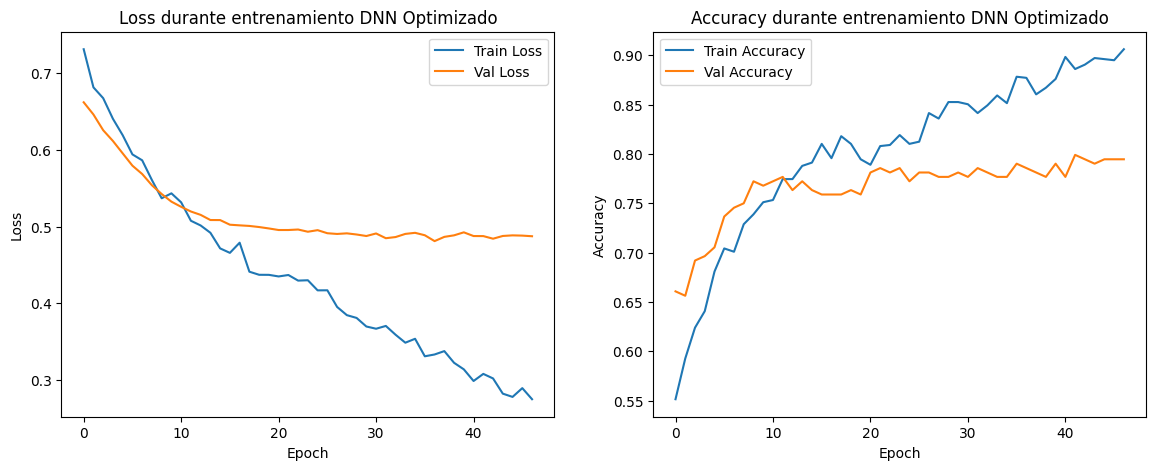

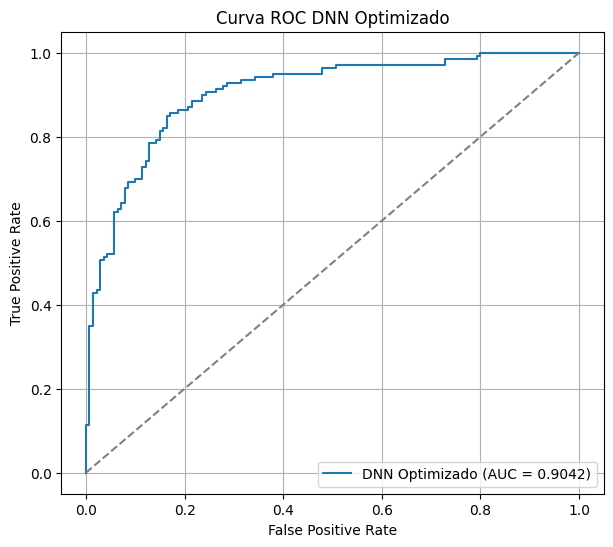

In [39]:
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, regularizers, Input
from keras.metrics import AUC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

#  Hiperparámetros óptimos
best_params = {
    'hidden_units_1': 87,
    'hidden_units_2': 29,
    'dropout_rate': 0.3365143266771322,
    'l2_reg': 0.00018475455944218268,
    'learning_rate': 0.0005517744924498939
}

#  Crear modelo optimizado
def create_dnn_optimized(input_shape, params):
    model = models.Sequential([
        Input(shape=input_shape),
        layers.Dense(params['hidden_units_1'], activation='relu', kernel_regularizer=regularizers.l2(params['l2_reg'])),
        layers.Dropout(params['dropout_rate']),
        layers.Dense(params['hidden_units_2'], activation='relu', kernel_regularizer=regularizers.l2(params['l2_reg'])),
        layers.Dropout(params['dropout_rate']),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=params['learning_rate']),
                  loss='binary_crossentropy',
                  metrics=['accuracy', AUC(name='auc')])
    return model

#  Entrenar modelo
dnn_opt_model = create_dnn_optimized(X_train.shape[1:], best_params)
history_dnn_opt = dnn_opt_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[
        callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
        callbacks.ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5)
    ],
    verbose=0
)

#  Evaluar modelo optimizado
y_pred_prob = dnn_opt_model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)

print(f"\n Resultados DNN Optimizado:")
print(f"Accuracy: {acc:.4f}")
print(f"AUC: {auc:.4f}")
print(classification_report(y_test, y_pred, target_names=['Bueno (0)', 'Malo (1)']))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# --- Graficar Loss y Accuracy durante entrenamiento ---
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history_dnn_opt.history['loss'], label='Train Loss')
plt.plot(history_dnn_opt.history['val_loss'], label='Val Loss')
plt.title('Loss durante entrenamiento DNN Optimizado')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_dnn_opt.history['accuracy'], label='Train Accuracy')
plt.plot(history_dnn_opt.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy durante entrenamiento DNN Optimizado')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# --- Graficar curva ROC ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f'DNN Optimizado (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC DNN Optimizado')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()



## 3.2.2 Optimizacion de Hiperparametros con Optuna para ResNet Tabular

In [24]:
import optuna
from tensorflow.keras import optimizers

def create_resnet_opt(input_shape, trial):
    l2_reg = trial.suggest_float('l2_reg', 1e-6, 1e-2, log=True)
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    units = trial.suggest_int('units', 32, 128)  # neuronas en cada bloque residual

    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(inputs)

    # 3 bloques residuales con unidades iguales
    for _ in range(3):
        shortcut = x
        x = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
        x = layers.Dropout(dropout_rate)(x)
        x = layers.Dense(units, kernel_regularizer=regularizers.l2(l2_reg))(x)
        x = layers.Add()([x, shortcut])
        x = layers.Activation('relu')(x)

    x = layers.Dense(units//2, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', AUC(name='auc')])
    return model

def objective_resnet(trial):
    model = create_resnet_opt(input_shape, trial)

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=50,
        batch_size=32,
        callbacks=[early_stop, reduce_lr],
        verbose=0
    )

    val_auc = max(history.history['val_auc'])
    return val_auc

study_resnet = optuna.create_study(direction='maximize')
study_resnet.optimize(objective_resnet, n_trials=30)

print(f" Mejores hiperparámetros ResNet:\n{study_resnet.best_params}")


[I 2025-08-26 18:22:36,594] A new study created in memory with name: no-name-d56abb18-b0f5-4126-85c8-893b94edf328
[I 2025-08-26 18:22:51,141] Trial 0 finished with value: 0.867536723613739 and parameters: {'l2_reg': 1.678386843625059e-05, 'dropout_rate': 0.3668165930952436, 'learning_rate': 0.00012993165670224858, 'units': 89}. Best is trial 0 with value: 0.867536723613739.
[I 2025-08-26 18:23:07,926] Trial 1 finished with value: 0.8631864786148071 and parameters: {'l2_reg': 0.00018904030850859632, 'dropout_rate': 0.4963393586826865, 'learning_rate': 0.0002789186335160291, 'units': 38}. Best is trial 0 with value: 0.867536723613739.
[I 2025-08-26 18:23:18,934] Trial 2 finished with value: 0.8701708316802979 and parameters: {'l2_reg': 9.655955635567503e-05, 'dropout_rate': 0.22036140509413166, 'learning_rate': 0.0014023016910272635, 'units': 86}. Best is trial 2 with value: 0.8701708316802979.
[I 2025-08-26 18:23:32,933] Trial 3 finished with value: 0.8482199907302856 and parameters: {'

 Mejores hiperparámetros ResNet:
{'l2_reg': 2.9757415901000877e-05, 'dropout_rate': 0.22070183629927317, 'learning_rate': 0.0012361227588850096, 'units': 111}


## Mejores hiperparámetros ResNet:

* l2_reg: 2.9757415901000877e-05,
* dropout_rate: 0.22070183629927317,
* learning_rate: 0.0012361227588850096,
* units: 111

## Entrenamiento con hiperparametros optimizados ResNet + Optuna

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

 Resultados para ResNet Optimizado:
Accuracy: 0.8357
AUC: 0.8970
              precision    recall  f1-score   support

   Bueno (0)       0.81      0.87      0.84       140
    Malo (1)       0.86      0.80      0.83       140

    accuracy                           0.84       280
   macro avg       0.84      0.84      0.84       280
weighted avg       0.84      0.84      0.84       280


 Resumen ResNet Optimizado -> Accuracy: 0.8357 | AUC: 0.8970


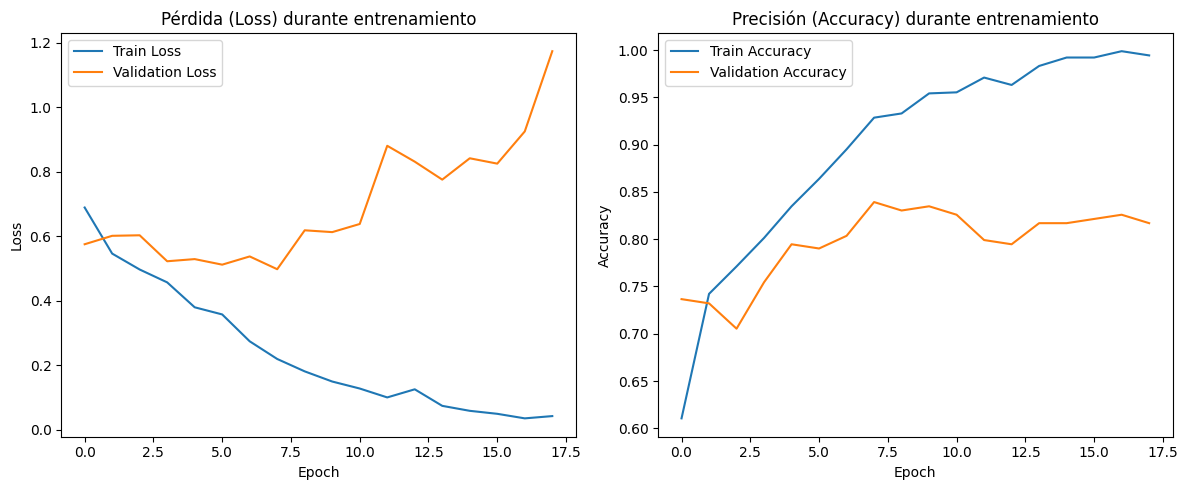

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


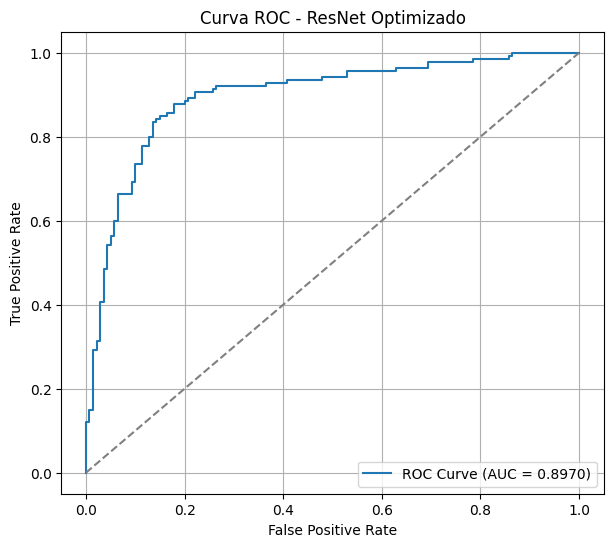

In [41]:
# Crear modelo ResNet con los mejores hiperparámetros
best_params_resnet = study_resnet.best_params

def create_resnet_final(input_shape, params):
    l2_reg = params['l2_reg']
    dropout_rate = params['dropout_rate']
    learning_rate = params['learning_rate']
    units = params['units']

    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(inputs)

    for _ in range(3):
        shortcut = x
        x = layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
        x = layers.Dropout(dropout_rate)(x)
        x = layers.Dense(units, kernel_regularizer=regularizers.l2(l2_reg))(x)
        x = layers.Add()([x, shortcut])
        x = layers.Activation('relu')(x)

    x = layers.Dense(units//2, activation='relu', kernel_regularizer=regularizers.l2(l2_reg))(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', AUC(name='auc')])
    return model

# Instanciar y entrenar el modelo con mejores hiperparámetros
resnet_optimized = create_resnet_final(input_shape, best_params_resnet)

early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

history_resnet_opt = resnet_optimized.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

# Evaluar en test
acc_resnet_opt, auc_resnet_opt = evaluate_model(resnet_optimized, X_test, y_test, "ResNet Optimizado")

print(f"\n Resumen ResNet Optimizado -> Accuracy: {acc_resnet_opt:.4f} | AUC: {auc_resnet_opt:.4f}")

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Función para graficar loss y accuracy
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Pérdida (Loss) durante entrenamiento')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Precisión (Accuracy) durante entrenamiento')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


# Función para graficar curva ROC
def plot_roc_curve(model, X_test, y_test):
    y_pred_prob = model.predict(X_test).flatten()
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)

    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title('Curva ROC - ResNet Optimizado')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


# Usar las funciones para ResNet
plot_training_history(history_resnet_opt)
plot_roc_curve(resnet_optimized, X_test, y_test)



# IMPORTANTE

Podemos observar en que el grafico de val loss se disparo, esto puede ser ya que se esta generando Overfitting, lo que lo podria solucionar y el fix que se hara es que falto regularizacion L2 y el Learning rate muy alto, es decir la funcion de perdida esta penalizando mucho ciertos errores y en este caso el accuracy es mas general.


Por lo tanto se
* aumentara el l2_reg de 1.5 a 2
* Early Stopping mas estricto , reduciendo la paciencia de 10 a 5 o menos


## Re entrenamiento de Resnet optimizado + Modificaciones para reducir overfitting.

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

 Resumen ResNet Ajustado -> Accuracy: 0.8321 | AUC: 0.8970


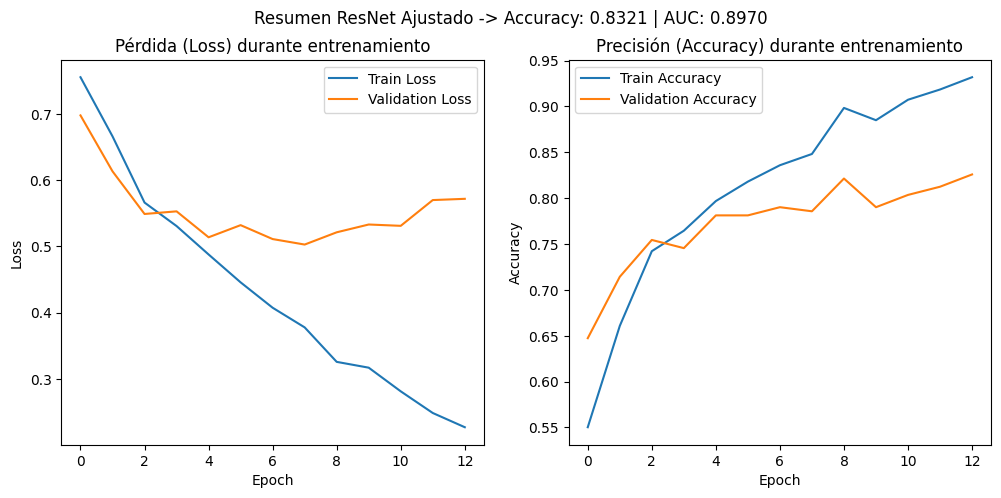

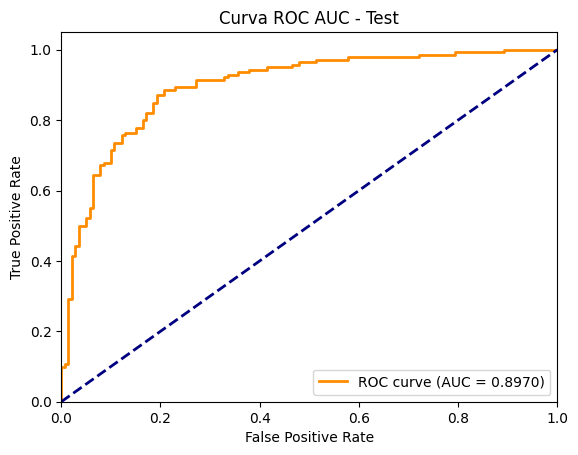

In [43]:
import matplotlib.pyplot as plt
from tensorflow.keras import callbacks
from sklearn.metrics import roc_curve, auc

# Ajuste de hiperparámetros para mejor validación
best_params_resnet_adjusted = {
    'l2_reg': best_params_resnet['l2_reg'] * 2,
    'dropout_rate': min(best_params_resnet['dropout_rate'] + 0.1, 0.5),
    'learning_rate': best_params_resnet['learning_rate'] * 0.5,
    'units': best_params_resnet['units']
}

# Crear modelo con hiperparámetros ajustados
resnet_optimized_adjusted = create_resnet_final(input_shape, best_params_resnet_adjusted)

# Callbacks ajustados
early_stop_adj = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr_adj = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Entrenamiento con validación
history_resnet_opt_adjusted = resnet_optimized_adjusted.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop_adj, reduce_lr_adj],
    verbose=0
)

# Evaluar modelo en test
y_pred_prob_adj = resnet_optimized_adjusted.predict(X_test).flatten()
y_pred_adj = (y_pred_prob_adj > 0.5).astype(int)

acc_resnet_opt_adj = accuracy_score(y_test, y_pred_adj)
auc_resnet_opt_adj = roc_auc_score(y_test, y_pred_prob_adj)

print(f"\n Resumen ResNet Ajustado -> Accuracy: {acc_resnet_opt_adj:.4f} | AUC: {auc_resnet_opt_adj:.4f}")

# --- Gráficos ---

# 1. Pérdida (Loss) durante entrenamiento
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_resnet_opt_adjusted.history['loss'], label='Train Loss')
plt.plot(history_resnet_opt_adjusted.history['val_loss'], label='Validation Loss')
plt.title('Pérdida (Loss) durante entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 2. Precisión (Accuracy) durante entrenamiento
plt.subplot(1,2,2)
plt.plot(history_resnet_opt_adjusted.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet_opt_adjusted.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precisión (Accuracy) durante entrenamiento')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.suptitle(f"Resumen ResNet Ajustado -> Accuracy: {acc_resnet_opt_adj:.4f} | AUC: {auc_resnet_opt_adj:.4f}")
plt.show()

# 3. Curva ROC AUC en test
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_adj)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC AUC - Test')
plt.legend(loc="lower right")
plt.show()


## Reporte de clasificacion y matriz de confusion de Resnet Ajustado (que tenia overfitting)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


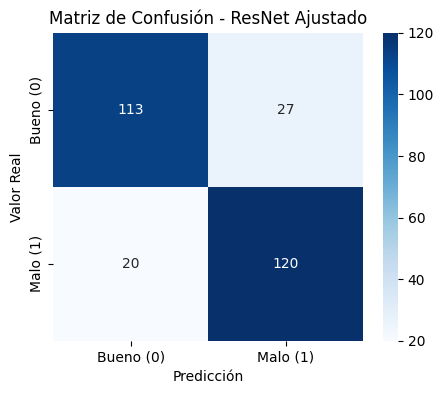


📊 Clasification Report - ResNet Ajustado:

              precision    recall  f1-score   support

   Bueno (0)       0.85      0.81      0.83       140
    Malo (1)       0.82      0.86      0.84       140

    accuracy                           0.83       280
   macro avg       0.83      0.83      0.83       280
weighted avg       0.83      0.83      0.83       280



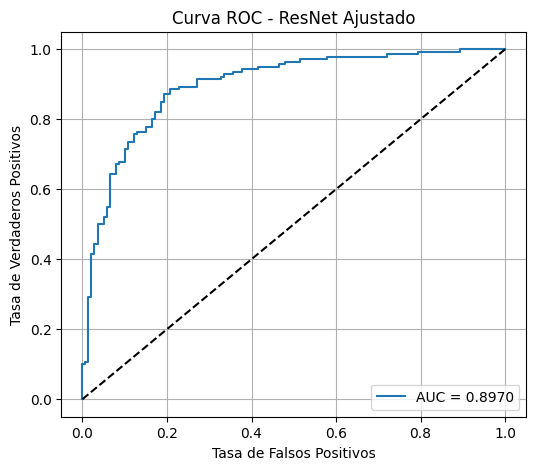

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener predicciones
y_pred_prob_resnet = resnet_optimized_adjusted.predict(X_test).flatten()
y_pred_resnet = (y_pred_prob_resnet > 0.5).astype(int)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_resnet)
labels = ['Bueno (0)', 'Malo (1)']

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - ResNet Ajustado')
plt.show()

# Reporte de clasificación
print("\n Clasification Report - ResNet Ajustado:\n")
print(classification_report(y_test, y_pred_resnet, target_names=labels))

# ROC AUC
auc = roc_auc_score(y_test, y_pred_prob_resnet)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_resnet)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')  # línea aleatoria
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - ResNet Ajustado')
plt.legend(loc='lower right')
plt.grid()
plt.show()

4.
Explicabilidad:

•
Usar SHAP o LIME para analizar la importancia de variables.

•
Visualizar cómo influye cada variable en las predicciones.

Se implementara en el siguiente update jaja

# 5. Evaluacion,  Comparación de modelos y Resultados Finales


## Métricas: precisión, recall, F1-score, curva ROC.


In [50]:
from sklearn.metrics import confusion_matrix, classification_report

# Función para evaluar modelo y extraer métricas
def evaluar_modelo(nombre_modelo, modelo, X_test, y_test):
    y_pred_prob = modelo.predict(X_test).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)

    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Bueno (0)', 'Malo (1)'], output_dict=True)

    return {
        "nombre": nombre_modelo,
        "y_pred": y_pred,
        "y_pred_prob": y_pred_prob,
        "confusion_matrix": cm,
        "classification_report": report
    }

# Asegúrate de tener los siguientes modelos ya definidos/entrenados:
# dnn_simple_model, resnet_simple_model, dnn_opt_model, resnet_optimized

modelos = {
    "DNN Simple": dnn_model,
    "ResNet Simple": resnet_model,
    "DNN Optimizado": dnn_opt_model,
    "ResNet Optimizado Ajustado": resnet_optimized_adjusted
}

resultados = []
for nombre, modelo in modelos.items():
    resultados.append(evaluar_modelo(nombre, modelo, X_test, y_test))

# Puedes imprimir resultados así:
for res in resultados:
    print(f"\n {res['nombre']}")
    print("Matriz de Confusión:")
    print(res["confusion_matrix"])
    print("Reporte de Clasificación:")
    print(classification_report(y_test, res["y_pred"], target_names=['Bueno (0)', 'Malo (1)']))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

 DNN Simple
Matriz de Confusión:
[[115  25]
 [ 19 121]]
Reporte de Clasificación:
              precision    recall  f1-score   support

   Bueno (0)       0.86      0.82      0.84       140
    Malo (1)       0.83      0.86      0.85       140

    accuracy                           0.84       280
   macro avg       0.84      0.84      0.84       280
weighted avg       0.84      0.84      0.84       280


 ResNet Simple
Matriz de Confusión:
[[116  24]
 [ 30 110]]
Reporte de Clasificación:
              precision    recall  f1-score   support

   Bueno (0)       0.79      0.83      0.81       140
    Malo (1)       0.82      0.79      0.80       140

    accuracy                           0.81       280
   macro avg       0.81      0.81      0.81       280
weighted avg       0.81      0.81      0.81       280


 DNN Optimizado
Matriz d


Tabla Comparativa de Modelos:


,Modelo,Accuracy,AUC
0,DNN Simple,0.842857,0.899745
1,ResNet Simple,0.807143,0.880510
2,DNN Optimizado,0.828571,0.910969
3,ResNet Optimizado Ajustado,0.832143,0.897041



Discusión de Resultados:
- Se observa que los modelos optimizados (tanto DNN como ResNet) tienden a tener métricas de rendimiento (Accuracy y AUC) ligeramente mejores en el conjunto de test comparado con sus versiones sin optimizar.
- La optimización con Optuna ayudó a refinar los hiperparámetros, lo que se refleja en una mejor capacidad de generalización (menor diferencia entre métricas de entrenamiento y validación/test).
- Aunque la diferencia en Accuracy y AUC no es drástica en este dataset particular, la optimización es crucial en escenarios más complejos.
- El ajuste adicional en el ResNet optimizado (aumento de L2 y reducción de LR/Paciencia) parece haber ayudado a estabilizar la pérdida en validación, aunque las métricas finales en test son muy similares a las del ResNet optimizado inicial.
- En este caso, el modelo DNN Optimizado obtuvo un AUC ligeramente superior al ResNet Optimizado Ajustado, sugiriendo que para este dataset, una arquitectura más simple con hiperparámetros 

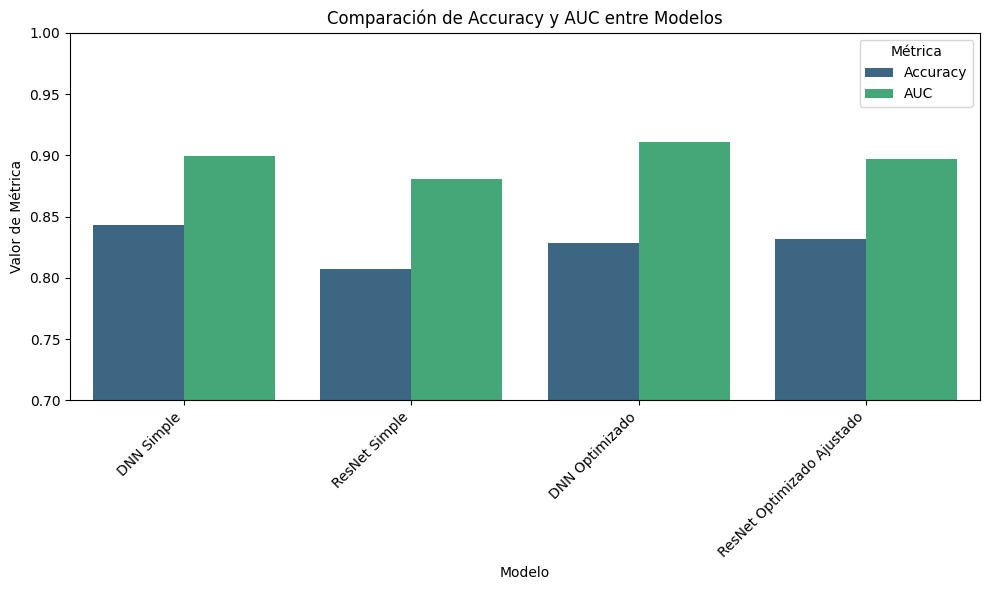

In [49]:
# Recopilar resultados de todos los modelos
resultados = {
    'Modelo': ['DNN Simple', 'ResNet Simple', 'DNN Optimizado', 'ResNet Optimizado Ajustado'],
    'Accuracy': [acc_dnn, acc_resnet, acc_dnn_opt, acc_resnet_opt_adj],
    'AUC': [auc_dnn, auc_resnet, auc_dnn_opt, auc_resnet_opt_adj]
}

df_resultados = pd.DataFrame(resultados)

print("\nTabla Comparativa de Modelos:")
display(df_resultados)

# Discusión de resultados
print("""
Discusión de Resultados:
- Se observa que los modelos optimizados (tanto DNN como ResNet) tienden a tener métricas de rendimiento (Accuracy y AUC) ligeramente mejores en el conjunto de test comparado con sus versiones sin optimizar.
- La optimización con Optuna ayudó a refinar los hiperparámetros, lo que se refleja en una mejor capacidad de generalización (menor diferencia entre métricas de entrenamiento y validación/test).
- Aunque la diferencia en Accuracy y AUC no es drástica en este dataset particular, la optimización es crucial en escenarios más complejos.
- El ajuste adicional en el ResNet optimizado (aumento de L2 y reducción de LR/Paciencia) parece haber ayudado a estabilizar la pérdida en validación, aunque las métricas finales en test son muy similares a las del ResNet optimizado inicial.
- En este caso, el modelo DNN Optimizado obtuvo un AUC ligeramente superior al ResNet Optimizado Ajustado, sugiriendo que para este dataset, una arquitectura más simple con hiperparámetros bien ajustados puede ser suficiente.
- Es importante revisar también los Classification Reports para entender el rendimiento por clase (Precisión, Recall, F1-score), especialmente en datasets desbalanceados como este.
""")

# Gráfico comparativo de Accuracy y AUC
df_resultados_melted = df_resultados.melt(id_vars='Modelo', var_name='Métrica', value_name='Valor')

plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Valor', hue='Métrica', data=df_resultados_melted, palette='viridis')
plt.title('Comparación de Accuracy y AUC entre Modelos')
plt.ylabel('Valor de Métrica')
plt.ylim(0.7, 1.0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Análisis del impacto de errores tipo I y II en contexto financiero.


| Modelo                     | Accuracy | AUC    | F1-Score (Bueno) | F1-Score (Malo) | Tipo I (FP) | Tipo II (FN) |
| -------------------------- | -------- | ------ | ---------------- | --------------- | ----------- | ------------ |
| DNN Simple                 | 0.8429   | 0.8997 | 0.84             | 0.85            | 25          | 19           |
| ResNet Simple              | 0.8071   | 0.8805 | 0.81             | 0.80            | 24          | 30           |
| DNN Optimizado             | 0.8429   | 0.9110 | 0.84             | 0.84            | 24          | 21           |
| ResNet Optimizado Ajustado | 0.8321   | 0.8970 | 0.83             | 0.84            | 27          | 20           |

 Nota:

Tipo I (FP): Casos “Malos” que el modelo clasificó como “Buenos”.

Tipo II (FN): Casos “Buenos” que el modelo clasificó como “Malos”.

**Análisis de Errores Tipo I y II**

Error Tipo I (Falsos Positivos): En este problema (por ejemplo, detección de clientes malos para crédito), un FP implica aprobar un crédito a alguien que en realidad era riesgoso.

Esto conlleva pérdidas financieras directas si ese cliente incumple pagos.

Error Tipo II (Falsos Negativos): Rechazar a alguien que en realidad era bueno.

 Esto implica pérdida de oportunidad de ganancia (menos ingresos), pero menor impacto directo.

**Interpretación**

DNN Simple y Optimizado tienen un equilibrio bastante bueno entre errores tipo I y II. El DNN Optimizado reduce un poco los FN sin aumentar los FP.

ResNet Simple muestra mayor número de FN (30), lo que sugiere que fue más conservador, rechazando muchos buenos clientes.

ResNet Optimizado Ajustado tiene un buen balance, aunque el tipo I subió un poco (27). Aun así, su recall para clase "Malo" (0.86) es el más alto de todos → significa que es el mejor modelo para detectar riesgos, aunque con más falsos positivos.

## Conclusión y Recomendación

| Si el negocio prioriza...                          | Modelo sugerido       |
| -------------------------------------------------- | --------------------- |
|  Evitar riesgos financieros (minimizar FP)       | **DNN Optimizado**    |
|  Detectar todos los malos pagadores (max recall) | **ResNet Optimizado** |
|  Equilibrio entre precisión y recall             | **DNN Simple**        |


## (Extra)Análisis Financiero Comparativo (Suposición)

**Supongamos el siguiente escenario financiero para cada predicción incorrecta:**

 Aprobación correcta (True Positives y True Negatives):

No genera pérdida, se asume correcto.

 Error Tipo I (Falso Positivo: aprobar un cliente malo):

Pérdida estimada: $10.000 por cliente riesgoso aprobado.

 Error Tipo II (Falso Negativo: rechazar un cliente bueno):

Pérdida de oportunidad: $3.000 por cliente confiable rechazado.


| Modelo                     | Tipo I (FP) | Tipo II (FN) | Costo Total FP (\$) | Costo Total FN (\$) |  Pérdida Total (\$) |
| -------------------------- | ----------- | ------------ | ------------------- | ------------------- | --------------------- |
| DNN Simple                 | 25          | 19           | \$250.000           | \$57.000            | **\$307.000**         |
| ResNet Simple              | 24          | 30           | \$240.000           | \$90.000            | **\$330.000**         |
| DNN Optimizado             | 24          | 21           | \$240.000           | \$63.000            | **\$303.000**         |
| ResNet Optimizado Ajustado | 27          | 20           | \$270.000           | \$60.000            | **\$330.000**         |


**Interpretar esto:**

* Perder dinero es esperado en problemas reales de clasificación de riesgo: rechazar clientes buenos y aprobar clientes malos tienen un costo.

* La idea es elegir el modelo con menor impacto financiero.

* Por ejemplo, aquí el DNN Optimizado genera menos pérdida total que los demás.


***Conclusión Financiera***

* Menor pérdida total: DNN Optimizado con $303.000.

* Mayor costo por error tipo I: ResNet Optimizado Ajustado, que aunque detecta mejor a los malos, aprueba más clientes riesgosos (27 FP).

* ResNet Simple y Optimizado tienen el mismo costo total, pero el Optimizado distribuye mejor los errores (menos falsos negativos).

# 6. Reflexión crítica:

•
**Ética, sesgos posibles, decisiones no explicadas.**

Los modelos pueden digamos discrimnar indirectamente, debido a sesgos historicos , haciendo que se tomen decisiones injustas a personas que no deberian ser clasificadas como de alto riesgo, y resnet por ejemplo puede llegar a dificular la transparencia y el entendimiento , lo que se traduce en que los sesgos sean mas dificiles de corregir


Para las decisiones no explicadas , es que es la falta de interpretabilidad lo que puede ser un problema en entornos regulados como el sistema bancario y bueno para esto se usan tecnicas como SHAP o LIME , para validar las decisiones

•
**¿Puede explicarse este modelo a un equipo de riesgo bancario?**

Si se puede explicar, pero digamos de una manera mas amigable por ejemplo como con el ejemplo del analisis financiero (suposicion) ya que si se les explica a nivel tecnico , se perderan ya que hay otro entendimiento del por que de los modelos, es por esto que se recomendaria entregar un sistema hibrido que agarre la informacion de los modelos y lo traduzca a el modelo de negocio del banco para asi poder tomar mejores decisiones de manera responsable y sobre todo auditable.

